# Code Alongs - Overfitting and Underfitting

### Simulate Data

$y = a_0 + a_1x + a_2x^2 + \epsilon$

where $\epsilon \sim \mathcal{N}(0,1)$ (the error is standard normal distributed)

In [161]:
import numpy as np
import matplotlib.pyplot as plt 

samples = 100
X = np.random.uniform(-3,3, (samples, 1))

X.shape

(100, 1)

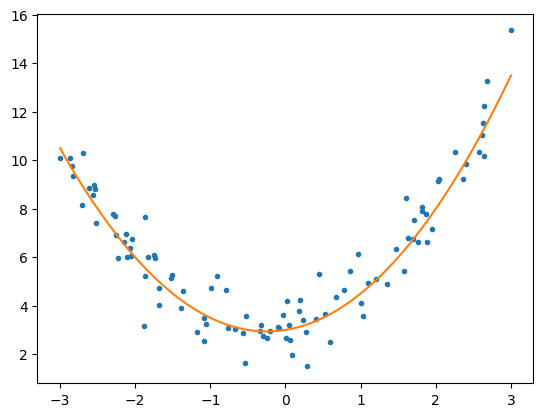

In [162]:
# a0 = 3, a1 = 0.5, a2 = 1
f =lambda x: x**2 + 0.5*x + 3
# y = a0 + a1x + a2x^2 + epsilon
y = f(X) + np.random.randn(samples, 1)

# linspace giveds equally spaced sumbers between low and high
# between -3 and 3 we 100 equally spaced numbers
x = np.linspace(-3,3, samples)

plt.plot(X, y, '.')
plt.plot(x, f(x))

<Axes: title={'center': '$y = x^2+0.5x+3+\\epsilon$'}>

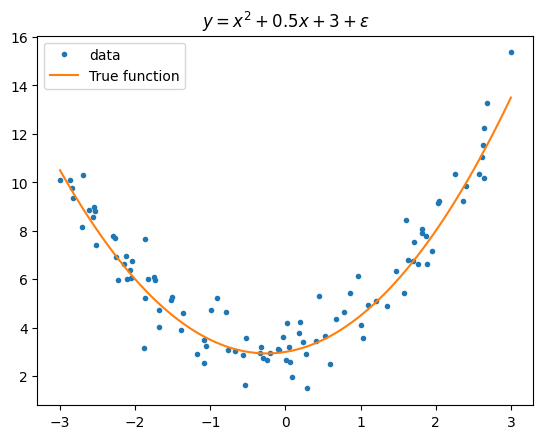

In [163]:
def draw_data():
    fig, ax = plt.subplots()
    ax.plot(X,y, '.', label="data")
    ax.plot(x, f(x), label="True function")
    ax.set(title= r"$y = x^2+0.5x+3+\epsilon$")
    ax.legend()
    
    return ax
draw_data()

## Polynomial Regression

In [164]:
X[:5], X.shape

(array([[ 1.63000144],
        [ 0.00774699],
        [-1.74512371],
        [ 0.28036644],
        [ 1.60357881]]),
 (100, 1))

### Feature Engineering
- created polynomial features from the dataset

In [165]:
from sklearn.preprocessing import PolynomialFeatures

# include_bias = True -> a column of 1s are included, and if false its excluded 
# we use False as LinearRegression() handles the bias
# instantiate a PolynomialFeatures instance from the PolynomialFeatures class

poly = PolynomialFeatures(degree=2, include_bias=False)

# from X had [x1] -> now it has [x1 x1^2]
poly_features = poly.fit_transform(X)
poly_features[:5], poly_features.shape

(array([[ 1.63000144e+00,  2.65690469e+00],
        [ 7.74698996e-03,  6.00158534e-05],
        [-1.74512371e+00,  3.04545676e+00],
        [ 2.80366445e-01,  7.86053432e-02],
        [ 1.60357881e+00,  2.57146500e+00]]),
 (100, 2))

In [166]:
-4.38268394e-01**2,1.92079185e-01**2,(-4.19832772e-02)**2

(-0.19207918517933925, 0.03689441331026423, 0.00176259556445204)

### Train on transformed dataset

In [167]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_features, y)

# estimated: a1, a2 from data, note that true value was a1=0.5, a2=1
model.coef_

array([[0.55058857, 1.02561885]])

In [168]:
# x is our linspace, its 1 dimensional
x[:5], x.shape

(array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576]),
 (100,))

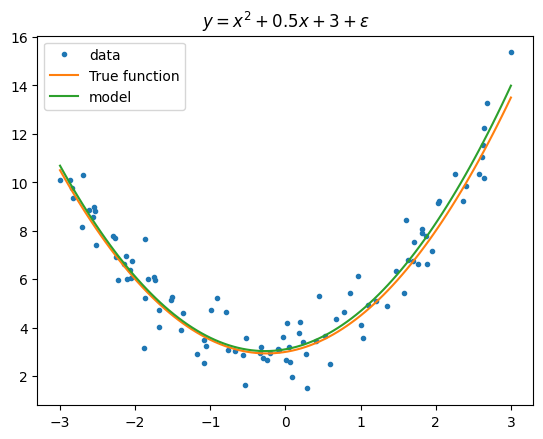

In [169]:
x_poly_features = poly.transform(x.reshape(-1,1))
y_pred = model.predict(x_poly_features)

ax = draw_data()
ax.plot(x, y_pred, label="model")
ax.legend()

## Underfitting

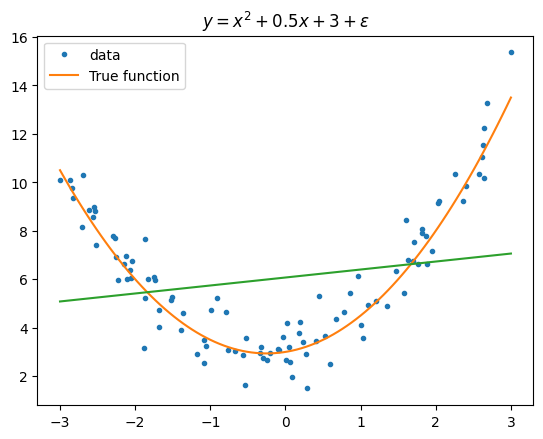

In [170]:
model = LinearRegression()

# we haven't transformed the feature space, so we get a linear model
model.fit(X,y)
ax = draw_data()
ax.plot(x, model.predict(x.reshape(-1,1)))

## Overfitting

In [171]:
poly_model_30 = PolynomialFeatures(30, include_bias=False)

X_features = poly_model_30.fit_transform(X)
X_features.shape

(100, 30)

In [172]:
x_poly_features = poly_model_30.transform(x.reshape(-1,1))
x_poly_features.shape

(100, 30)

[(-1.0, 15.0), Text(0.5, 1.0, 'Overfitted Model')]

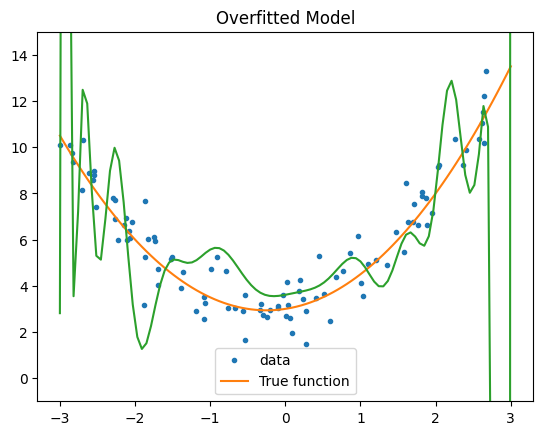

In [173]:
model = LinearRegression()
model.fit(X_features, y)

y_pred = model.predict(x_poly_features)

ax = draw_data()
ax.plot(x, y_pred)
ax.set(ylim=[-1,15], title="Overfitted Model")

## Choose a model

In [174]:
# simulate new data
samples = 10000
X = np.random.uniform(-3,3, (samples, 1))
X.shape

(10000, 1)

In [175]:
f = lambda x: x**4 + x**2 +.5*x+3
y = f(X) + np.random.randn(samples, 1)

y.shape

(10000, 1)

## Train|Validation|Test split

split dataset into

- train - train on training set
- validation - tune hyperparameter on validation set
- mtest - evaluate on test set
- in our case the degree is a hyperparameter

In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

# use test set and take half of it to use as test and half as validation
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42
)

# 2/3 train
# 1/3/2 val
#1/3/2 test

X_train.shape, X_val.shape, X_test.shape  

((6700, 1), (1650, 1), (1650, 1))

In [177]:
from sklearn.metrics import mean_absolute_error

RMSE_val = []

for degree in range(1,100):
    model_poly = PolynomialFeatures(degree, include_bias=False)
    # feature engineering -> transformed feature space
    train_features = model_poly.fit_transform(X_train)
    val_features = model_poly.fit_transform(X_val)
    
    model_linear_regression = LinearRegression()
    # polynomial regression -> trains on transformed feature space
    model_linear_regression.fit(train_features, y_train)
    
    # predict on validation data
    y_pred_val = model_linear_regression.predict(val_features)
    RMSE_val.append(np.sqrt(mean_absolute_error(y_val, y_pred_val)))

[Text(0.5, 0, 'Degree'),
 Text(0, 0.5, 'RMSE'),
 Text(0.5, 1.0, 'RMSE on validation for different degrees of polynomilas')]

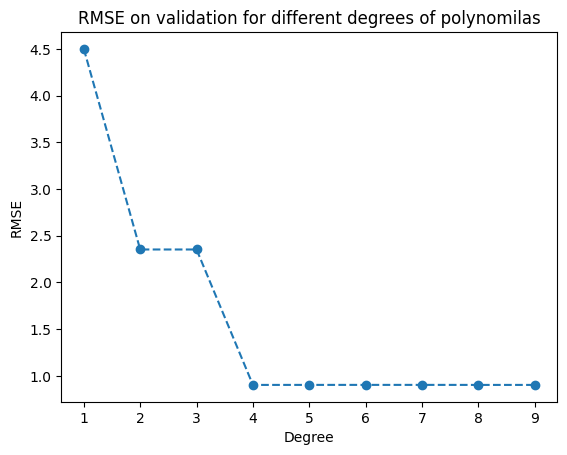

In [178]:
fig, ax = plt.subplots()
ax.plot(range(1, 10), RMSE_val[:9], "--o")
ax.set(
    xlabel="Degree",
    ylabel="RMSE",
    title="RMSE on validation for different degrees of polynomilas",
)

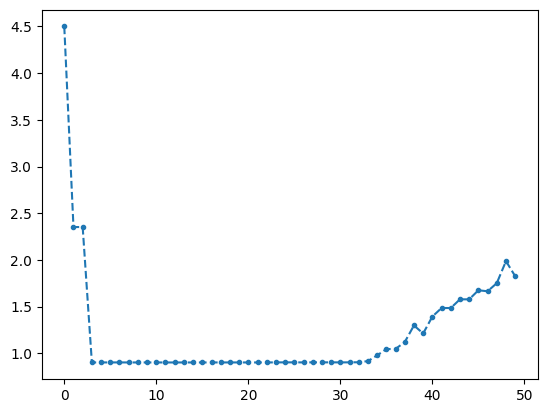

In [183]:
ax = plt.axes()

# try much higher degree polynomials and see that error actually increases
# note that this happen much faster for real data

ax.plot(range(50), RMSE_val[:50], '--.', label="Validation");

## Bias-Variance Trade-off

A models generalization error is bias + variance + irreducible error

- bias - difference between average prediction and correct value.
- high bias, pay little attention to data,
- oversimplifies and underfits.
- variance - spread of our data
- many degrees of freedom -> high variance -> overfit to data
- irreducible error - due to noise of data, only way to decrease this is to clean the data itself.
- Higher model complexity -> higher variance, lower bias

Lower model complexity -> lower variance, higher bias

The goal is to choose a model that is complex enough not to underfit, but not too complex to overfit. Need to find a balance between bias and variance. evaluation.